In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
def quadratic(z, c): 
    """ 
        Initial version w/o affine conjugation
    """
    return z**2 + c

def cubic(z, c): 
    """
        Here the critical points are +-c[0]
    """
    return z**3 + 3*c[0]**2 * z + c[1]

def get_attractor_quad(c, max_iter=1000):
    """ 
        By Fatou's theorem. Any attracting cycle contains a critical point.
        c is the parameter for f_c(z) = z^2 + c
    """
    z = 0j
    for k in range(max_iter): 
        z = quadratic(z, c)
        
    return z

def get_attractor_cubic(c, max_iter=100, escape_radius=1e10):
    z1 = 1j * c[0]
    z2 = -1j * c[0]
    
    for _ in range(max_iter):
        if abs(z1) < escape_radius:
            z1 = cubic(z1, c)
        else:
            z1 = np.inf 
            
        if abs(z2) < escape_radius:
            z2 = cubic(z2, c)
        else:
            z2 = np.inf
            
    return z1, z2

def compute_basin_cubic(c, p, resolution=1000, bounds=2.0, max_iter=1000, epsilon=1e-2):
    x = np.linspace(-bounds, bounds, resolution)
    y = np.linspace(-bounds, bounds, resolution)
    real, imag = np.meshgrid(x, y)
    grid = real + 1j * imag

    basin = np.zeros(grid.shape, dtype=int) # number of iterations to converge
    active = np.ones(grid.shape, dtype=bool) # has converged or not; has diverged or not; continue iterating only if active

    for i in range(max_iter): 
        if not np.any(active): 
            break 
        
        grid[active] = cubic(grid[active], c) # iterate active orbits

        diff = np.abs(grid - p)
        trapped = (diff < epsilon) & active

        basin[trapped] = i + 1
        active[trapped] = False

        escaped = (np.abs(grid) > 4.0) & active
        active[escaped] = False

    return basin 


(-2j, 2j)


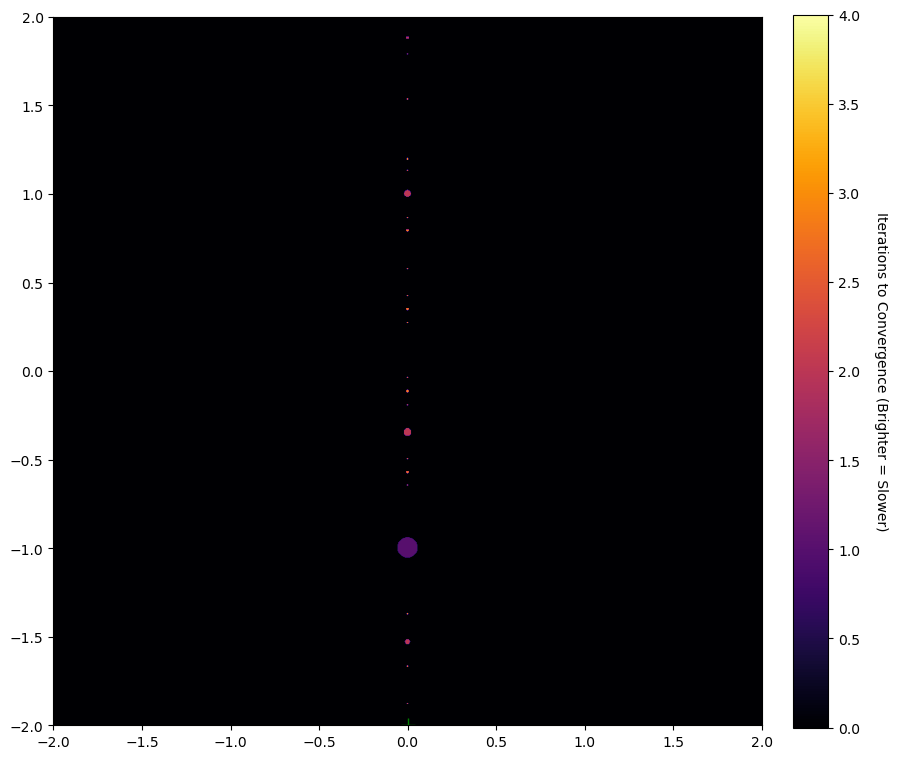

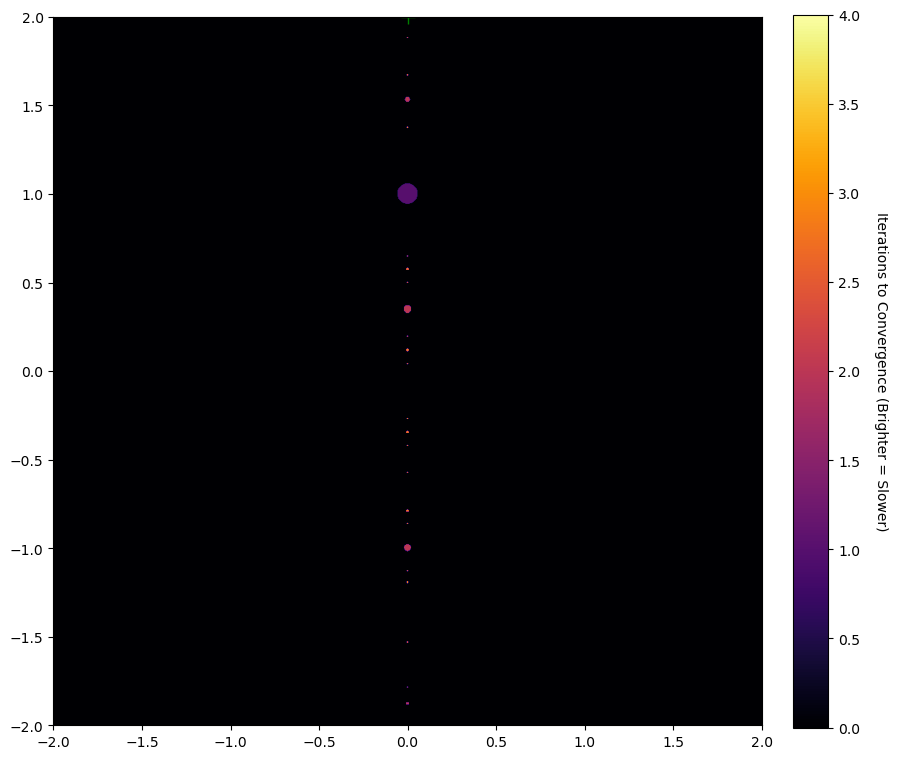

In [31]:
c_param = [1, 0]
print(get_attractor_cubic(c_param))
p_attractor_1 = get_attractor_cubic(c_param)[0]
basin_data_1 = compute_basin_cubic(c_param, p_attractor_1)

p_attractor_2 = get_attractor_cubic(c_param)[-1]
basin_data_2 = compute_basin_cubic(c_param, p_attractor_2)

bounds = 2.0

plt.figure(figsize=(10, 10))
img = plt.imshow(basin_data_1, extent=[-bounds, bounds, -bounds, bounds], origin='lower', cmap='inferno')
plt.plot(p_attractor_1.real, p_attractor_1.imag, 'g+', markersize=10)

cbar = plt.colorbar(img, fraction=0.046, pad=0.04)
cbar.set_label('Iterations to Convergence (Brighter = Slower)', rotation=270, labelpad=20)

plt.show()

plt.figure(figsize=(10, 10))
img = plt.imshow(basin_data_2, extent=[-bounds, bounds, -bounds, bounds], origin='lower', cmap='inferno')
plt.plot(p_attractor_2.real, p_attractor_2.imag, 'g+', markersize=10)

cbar = plt.colorbar(img, fraction=0.046, pad=0.04)
cbar.set_label('Iterations to Convergence (Brighter = Slower)', rotation=270, labelpad=20)

plt.show()